In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory
import glob
from tqdm import tqdm

2024-04-24 13:31:33.679842: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-24 13:31:34.778009: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
tf.config.list_physical_devices('GPU')

2024-04-24 13:31:37.309985: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-24 13:31:37.450992: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-24 13:31:37.451046: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# a list to collect paths of images
images_path = []
labels_path = []
masks_path = []

images_path = glob.glob('data/drone/original_images/*.jpg')
print(len(images_path))

labels_path = glob.glob('data/drone/label_images_semantic/*.png')
print(len(labels_path))

rgb_masks_path = glob.glob('data/drone/RGB_color_image_masks/*.png')
print(len(rgb_masks_path))

# Sort them
images_path = sorted(images_path)
labels_path = sorted(labels_path)
rgb_masks_path = sorted(rgb_masks_path)

400
400
400


In [4]:
resized_dims = (256, 256)

# create a list to store images
images = []
# iterate over 1000 image paths
for path in tqdm(images_path):
    # read file
    file = tf.io.read_file(path)
    # decode png file into a tensor
    image = tf.image.resize(tf.image.decode_png(file, channels=3, dtype=tf.uint8), resized_dims, method='nearest')
    # append to the list
    images.append(image)


# create a list to store masks
labels = []
# iterate over 1000 mask paths
for path in tqdm(labels_path):
    # read the file
    file = tf.io.read_file(path)
    # decode png file into a tensor
    label = tf.image.resize(tf.image.decode_png(file, channels=1, dtype=tf.uint8), resized_dims, method='nearest')
    # append mask to the list
    labels.append(label)

# create a list to store masks
rgb_masks = []
# iterate over 1000 mask paths
for path in tqdm(rgb_masks_path):
    # read the file
    file = tf.io.read_file(path)
    # decode png file into a tensor
    rgb_mask = tf.image.resize(tf.image.decode_png(file, channels=3, dtype=tf.uint8), resized_dims, method='nearest')
    # append mask to the list
    rgb_masks.append(rgb_mask)

  0%|          | 0/400 [00:00<?, ?it/s]2024-04-24 13:31:37.488997: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-24 13:31:37.489080: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-24 13:31:37.489115: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-24 13:31:39.319384: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-24 13:31:39.319449: I

In [20]:
# create a list to store masks
labels = []
# iterate over 1000 mask paths
for path in tqdm(labels_path):
    # read the file
    file = tf.io.read_file(path)
    # decode png file into a tensor
    label = tf.image.resize(tf.image.decode_png(file, channels=1, dtype=tf.uint8), resized_dims, method='nearest')
    # append mask to the list
    labels.append(label)

print(np.shape(labels))
np.max(labels)

for i in range(len(labels)):
    labels[i] = labels[i] / (nr_classes-1)

print(np.shape(images))
print(np.shape(labels))
np.max(images[0])
np.max(labels[0])

  0%|          | 0/400 [00:00<?, ?it/s]

100%|██████████| 400/400 [00:46<00:00,  8.61it/s]


(400, 256, 256, 1)
(400, 256, 256, 3)
(400, 256, 256, 23)


nan

In [5]:
nr_classes = np.unique(labels) # -> there are 23 classes!

# Normalize the RGB images and the bw images
for i in range(len(images)):
    images[i] = tf.cast(images[i], tf.float32) / 255.0
    labels[i] = labels[i] / (nr_classes-1)

In [6]:
# Save the arrays
np.savez(f'data/drone/dataset_{resized_dims[0]}x{resized_dims[1]}.npz', images=images, labels=labels, rgb_masks=rgb_masks)

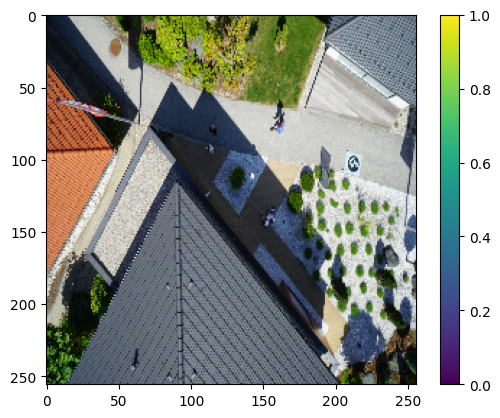

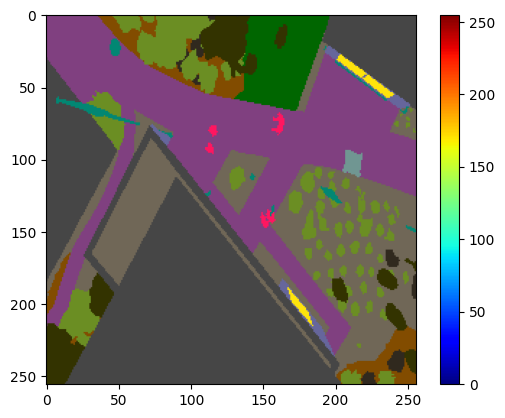

TypeError: Invalid shape (256, 256, 23) for image data

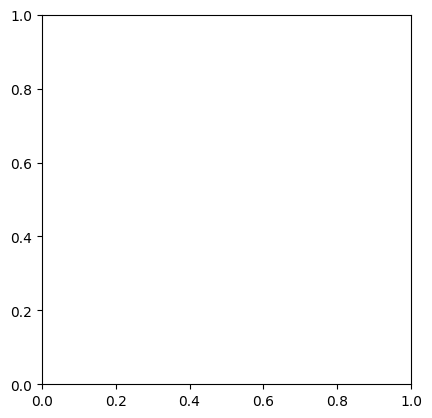

In [7]:
#visualizing a resized image and respective mask
# plot an image
plt.imshow(images[5])
plt.colorbar()
plt.show()

#plot a mask
plt.imshow(rgb_masks[5], cmap='jet')
plt.colorbar()
plt.show()

#plot the bw mask
plt.imshow(labels[5], cmap='jet')
plt.colorbar()
plt.show()

print(images_path[5])
print(rgb_masks_path[5])
print(labels_path[5])